In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, confusion_matrix, precision_recall_curve, PrecisionRecallDisplay, mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
# Data for regression model evaluation
data_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')
data_df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Make another dataframe of only numnerical features
df = data_df.select_dtypes(include = np.number)
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Simple Linear Regression Model

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

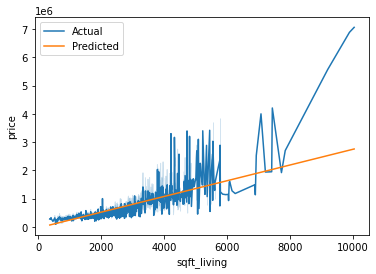

In [15]:
# Simple linear regression model with 'sqft_living' as the independent variable and 'price' as the dependent variable
lm = LinearRegression()

#test train split
x_train, x_test, y_train, y_test = train_test_split(df[['sqft_living']], df['price'], test_size=0.3, random_state=0)

# Fit the model with training data
lm.fit(x_train, y_train)

# Predict the model with test data
y_predicted = lm.predict(x_test)

# plot the predicted values against the actual values
sns.lineplot(x=x_test['sqft_living'], y=y_test, label='Actual');
sns.lineplot(x=x_test['sqft_living'], y=y_predicted, label='Predicted');

### Evaluation Metrics

In [18]:
# Calculate the R^2 score
print('R^2 score: ', r2_score(y_test, y_predicted))

# Calculate the mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_predicted))

R^2 score:  0.48889929019453016
Mean squared error:  70170013932.11592


#### Cross Validation
Cross validation is a technique used to evaluate machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data. This technique can be used to estimate the skill of a machine learning model on unseen data. It is called cross validation because it literally involves training and testing on different subsets of the available data in a round-robin fashion.

In [16]:
# Performance metrics for regression model using cross validation
from sklearn.model_selection import cross_val_score
print(f"Cross validation scores: {cross_val_score(lm, x_test, y_test, cv=5)}")

Cross validation scores: [0.49302698 0.437342   0.47450529 0.49576121 0.49786807]


It helps in understanding how well the model is performing on the data. The higher the score, the better the model is performing. The score is calculated using the R2 score. The R2 score is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. The higher the R2 score, the better the model fits the data.